# Simulación correlacion espacial

Hemos visto que los fotones son bien comportados, en especial siguen distribuciones de tipo Poissoniana

Simularemos la emisión de fotones, la produccion de pares por medio de la SPDC y finalmente el conteo de coincidencias.

Su tarea es variar la cantidad de fotones, el espacio a recorrer ver su comportamiento y comparar con lo medido en la práctica 4

Simulación completada.


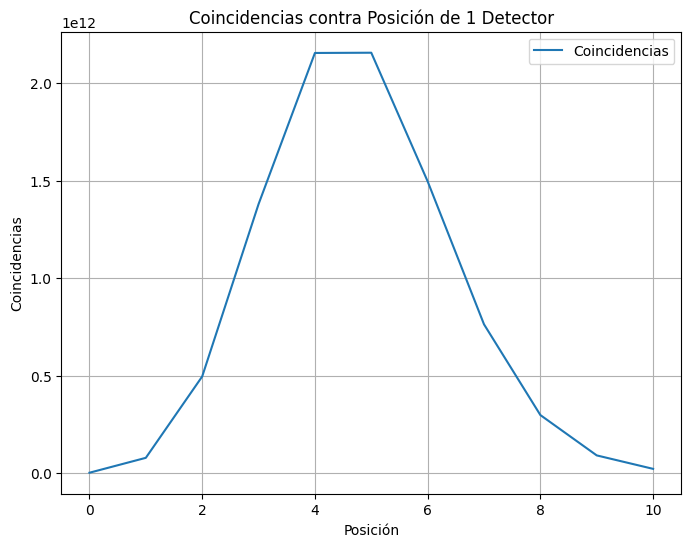

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import poisson

# Parámetros
N = 100000  # Número de fotones en un segundo
NQ = 10000  # Número de pares de fotones

## OJO: Recuerden que la probabilidad de encontrar un par es del 10% ##


NN = 500000  # Número de particiones en un segundo
nexp = 121  # Número de mediciones
NPos = 11  # Número de posiciones en el espacio

# Inicializar arrays
coincidences_positions = np.zeros(NPos)  # Para guardar las coincidencias en cada posición

# Distribución Poisson
mu = NPos // 2
positions = np.arange(NPos)
prob_distribution = poisson.pmf(positions, mu)
prob_distribution /= prob_distribution.sum()  # Normalizar

for j in range(nexp):
    # Series aleatorias
    st_positions = np.random.choice(positions, NN, p=prob_distribution)  # Posiciones de fotones transmitidos
    sr_positions = np.random.choice(positions, NN, p=prob_distribution)  # Posiciones de fotones reflejados

    # Serie aleatoria testigo, que también funciona como señal
    si_positions = np.random.choice(positions, NN, p=prob_distribution)  # Posiciones de fotones testigo

    # Asegurar una coincidencia del 10%
    coincidence_indices = np.random.rand(NN) < 0.1  # 10% probabilidad
    si_positions[coincidence_indices] = st_positions[coincidence_indices]

    # Contar fotones en cada posición
    st_counts = np.bincount(st_positions, minlength=NPos)
    sr_counts = np.bincount(sr_positions, minlength=NPos)
    si_counts = np.bincount(si_positions, minlength=NPos)

    # Distribuir los fotones
    dh = np.random.rand(NN)
    sit_positions = si_positions[dh >= 0.5]
    sir_positions = si_positions[dh < 0.5]
    sit_counts = np.bincount(sit_positions, minlength=NPos)
    sir_counts = np.bincount(sir_positions, minlength=NPos)

    st_counts += sit_counts
    sr_counts += sir_counts

    # Guardar las coincidencias en cada posición
    coincidences_positions += st_counts * sr_counts

print('Simulación completada.')

# Graficar coincidencias contra posición
plt.figure(figsize=(8, 6))
plt.plot(positions, coincidences_positions, label='Coincidencias')
plt.xlabel('Posición')
plt.ylabel('Coincidencias')
plt.title('Coincidencias contra Posición de 1 Detector')
plt.legend()
plt.grid(True)
plt.show()


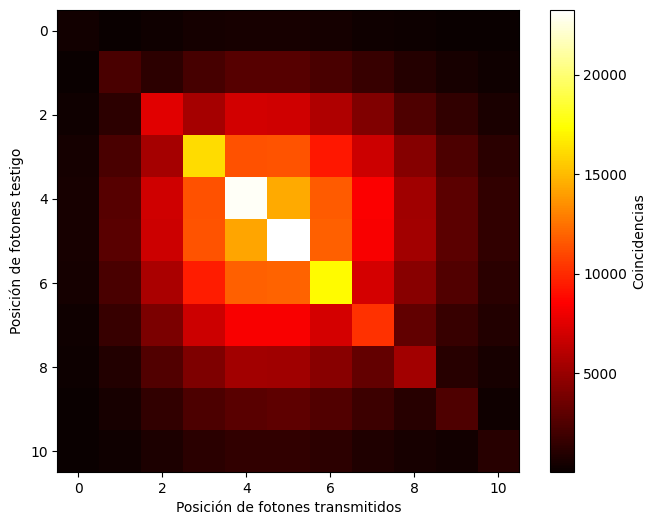

In [ ]:
coincidences_matrix = np.zeros((NPos, NPos))

for pos_si, pos_st in zip(si_positions, st_positions):
        coincidences_matrix[pos_si, pos_st] += 1

plt.figure(figsize=(8, 6))
plt.imshow(coincidences_matrix, cmap='hot', interpolation='nearest')
plt.colorbar(label='Coincidencias')
plt.xlabel('Posición de fotones transmitidos')
plt.ylabel('Posición de fotones testigo')
plt.show()

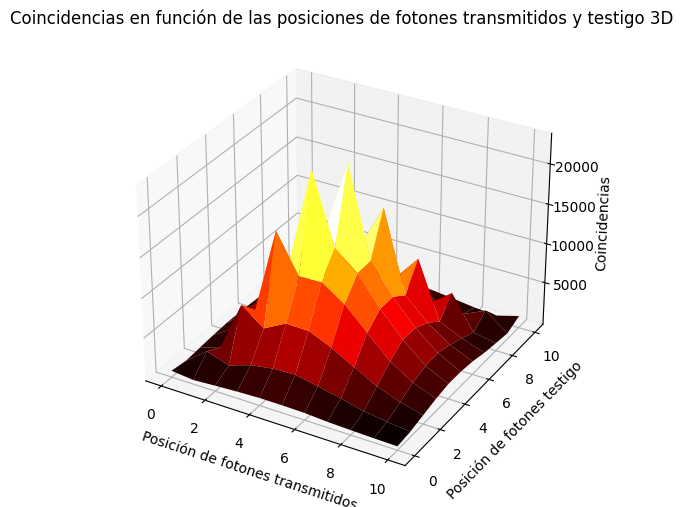

In [ ]:
x = np.arange(NPos)
y = np.arange(NPos)
X, Y = np.meshgrid(x, y)
Z = coincidences_matrix[X, Y]

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, cmap='hot')
ax.set_xlabel('Posición de fotones transmitidos')
ax.set_ylabel('Posición de fotones testigo')
ax.set_zlabel('Coincidencias')
ax.set_title('Coincidencias en función de las posiciones de fotones transmitidos y testigo 3D')
plt.show()

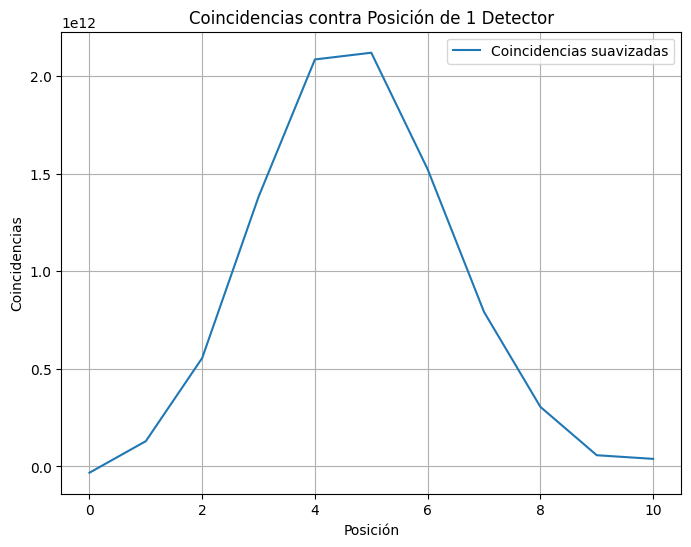

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import poisson
from scipy.signal import savgol_filter

# Parámetros
N = 100000  # Número de fotones en un segundo
NQ = 10000  # Número de pares de fotones
NN = 500000  # Número de particiones en un segundo
nexp = 121  # Número de mediciones
NPos = 11  # Número de posiciones en el espacio

# Inicializar arrays
coincidences_positions = np.zeros(NPos)  # Para guardar las coincidencias en cada posición

# Distribución Poisson
mu = NPos // 2
positions = np.arange(NPos)
prob_distribution = poisson.pmf(positions, mu)
prob_distribution /= prob_distribution.sum()  # Normalizar

for j in range(nexp):
    # ... (código original)

# Guardar las coincidencias en cada posición
    coincidences_positions += st_counts * sr_counts

# Aplicar filtro de suavizado
window_length = 5  # Longitud de la ventana del filtro
coincidences_smoothed = savgol_filter(coincidences_positions, window_length, 2)  # Orden 2

# Graficar coincidencias suavizadas contra posición
plt.figure(figsize=(8, 6))
plt.plot(positions, coincidences_smoothed, label='Coincidencias suavizadas')
plt.xlabel('Posición')
plt.ylabel('Coincidencias')
plt.title('Coincidencias contra Posición de 1 Detector')
plt.legend()
plt.grid(True)
plt.show()


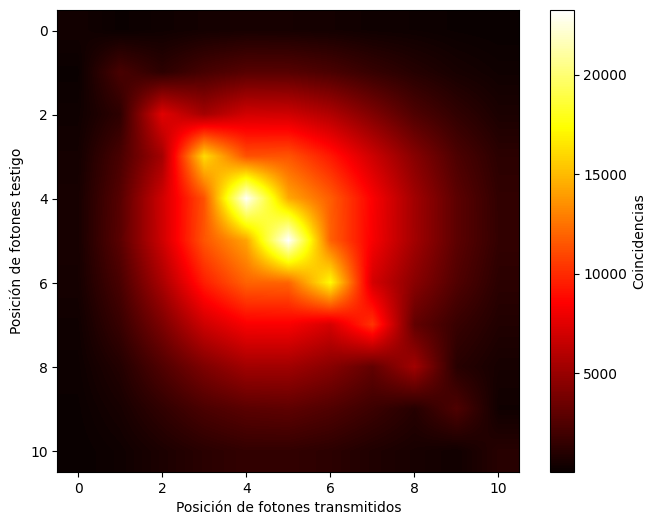

In [ ]:
coincidences_matrix = np.zeros((NPos, NPos))

for pos_si, pos_st in zip(si_positions, st_positions):
    coincidences_matrix[pos_si, pos_st] += 1

plt.figure(figsize=(8, 6))
plt.imshow(coincidences_matrix, cmap='hot', interpolation='bilinear')  # Cambia 'nearest' por 'bilinear'
plt.colorbar(label='Coincidencias')
plt.xlabel('Posición de fotones transmitidos')
plt.ylabel('Posición de fotones testigo')
plt.show()


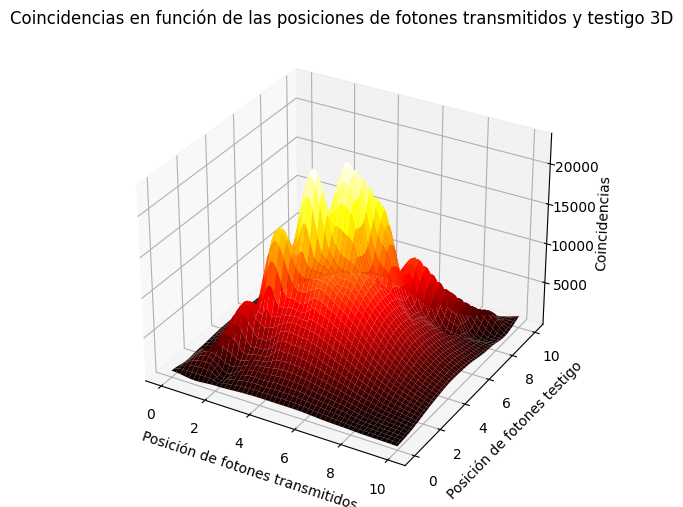

In [ ]:
from scipy.interpolate import griddata

# Crear una malla más densa
xi = np.linspace(x.min(), x.max(), 100)
yi = np.linspace(y.min(), y.max(), 100)
XI, YI = np.meshgrid(xi, yi)

# Interpolar los valores
ZI = griddata((X.flatten(), Y.flatten()), Z.flatten(), (XI, YI), method='cubic')

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(XI, YI, ZI, cmap='hot')
ax.set_xlabel('Posición de fotones transmitidos')
ax.set_ylabel('Posición de fotones testigo')
ax.set_zlabel('Coincidencias')
ax.set_title('Coincidencias en función de las posiciones de fotones transmitidos y testigo 3D')
plt.show()
